In [2]:
from sklearn.datasets import make_blobs

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X, y = make_blobs(
    n_samples=5000,
    centers=[[4,4], [-2,-1],[2,-3], [1,1]],
    cluster_std=0.9,
)

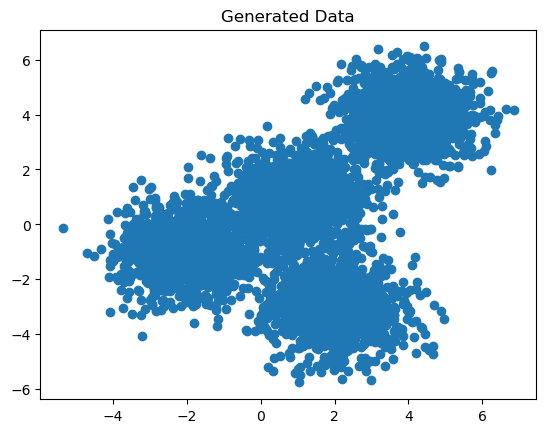

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.title('Generated Data')
plt.show()

In [4]:
from sklearn.cluster import KMeans

k_means = KMeans(
    init='k-means++',
    n_clusters=4, 
    n_init=12
)

In [5]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [6]:
k_means.labels = k_means.labels_

In [7]:
k_means.cluster_centers_ = k_means.cluster_centers_

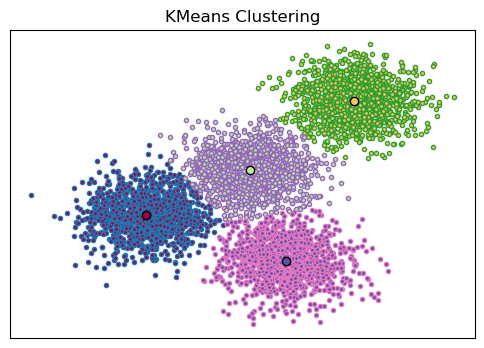

In [8]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels))))
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(set(k_means.labels_))), colors):
    my_members = (k_means.labels_ == k)
    cluster_center = k_means.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], '.', markerfacecolor=col)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans Clustering')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [9]:
k_means3 = KMeans(
    init='k-means++',
    n_clusters=3,
    n_init=12
)
k_means3.fit(X)

KMeans(n_clusters=3, n_init=12)

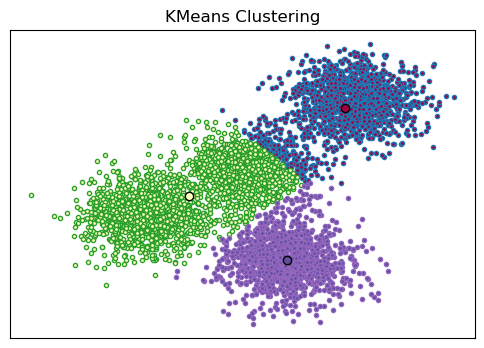

In [10]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(set(k_means3.labels_))), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], '.', markerfacecolor=col)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans Clustering')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [12]:
import pandas as pd

cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [13]:
df = cust_df.drop(['Address'], axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.values[:, 1:] #skiip customer id column
X = np.nan_to_num(X) #replace NaN with 0

Clus_dataSet = StandardScaler().fit_transform(X) #standardize the data



In [15]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init=12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)


[0 1 2 0 1 1 0 0 0 1 2 0 0 0 2 0 0 0 1 0 0 0 2 1 1 0 0 0 0 0 0 1 2 0 0 0 2
 2 0 1 2 1 0 1 0 1 0 0 0 0 1 1 2 0 2 2 2 0 0 0 1 0 1 1 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 1 0 0 2 1 0 1 0 0 0 2 2 0 0 2 2 0 0 0 0 2 0 2 1 0 2 2 1 0 0 0 0 0
 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 2
 0 0 0 1 2 0 0 0 0 1 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 2 0 0 2 1 2 0 0 1 2
 1 0 0 0 0 0 1 0 2 0 0 0 1 1 0 1 0 2 0 0 2 0 1 0 2 0 0 0 0 0 2 2 1 0 0 2 1
 0 0 0 0 1 0 0 2 0 0 0 0 1 0 0 2 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 2 0 2 0
 0 0 1 0 2 1 2 0 1 0 0 2 0 0 0 0 2 2 2 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 2 0 0
 2 0 2 1 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 2 1 0 2 0 0 0 2 2 0 0 0 1 2
 0 0 2 0 1 0 0 0 0 0 2 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 2 0 2 0 0 0 1 1 0
 2 0 1 2 2 0 0 0 2 0 0 0 0 0 1 0 1 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 2 0 0 2 2
 1 0 0 0 0 0 2 2 0 1 2 1 0 0 2 0 0 1 1 0 2 0 0 1 0 2 0 1 0 0 0 1 0 0 0 0 1
 0 2 0 0 0 0 1 2 0 0 1 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 2 0 0 0 2 0
 2 0 0 0 0 0 1 2 2 0 1 0 

In [16]:
df["Clus_km"] = labels
df.head()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


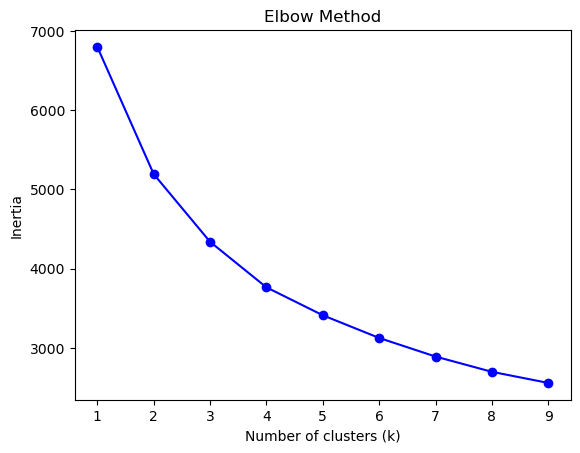

In [17]:
inertia = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(init="k-means++", n_clusters=k, n_init=12)
    km.fit(Clus_dataSet)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12)
    kmeans.fit(Clus_dataSet)
    score = silhouette_score(Clus_dataSet, kmeans.labels_)
    print(f'k={k}, silhouette score for k={k}: {score:.4f}')